In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# load model using pytorch from models folder
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(4, 16)  # Hidden layer with 16 neurons
        self.output = nn.Linear(16, 3)  # Output layer (3 classes)

    def forward(self, x):
        x = torch.relu(self.hidden(x))  # ReLU activation
        x = self.output(x) # no softmax here since we'll use nn.CrossEntropyLoss 
        return x 
    
# Initialize the model
model = MLP()
print(model)

MLP(
  (hidden): Linear(in_features=4, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=3, bias=True)
)


In [ ]:
# # Load the model
# model.load_state_dict(torch.load('models/iris_mlp.pth'))
# model.eval()

In [8]:
from torch.utils.data import DataLoader

# Load datasets

train_dataset = torch.load('data/train_dataset.pt')
val_dataset = torch.load('data/val_dataset.pt')
test_dataset = torch.load('data/test_dataset.pt')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from itertools import product
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def train_model(train_dataset, val_dataset, test_dataset, model_class, batch_size=32, learning_rate=0.001, num_epochs=50):
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    print('-'*50)
    print(f"Batch size: {batch_size}, Learning rate: {learning_rate}, Number of epochs: {num_epochs}")
    
    model = model_class()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        model.eval()
        epoch_val_loss = 0
        with torch.no_grad():
            for val_X, val_y in val_loader:
                val_outputs = model(val_X)
                val_loss = criterion(val_outputs, val_y)
                epoch_val_loss += val_loss.item()

        train_loss = epoch_train_loss / len(train_loader)
        val_loss = epoch_val_loss / len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    return model, train_losses, val_losses, test_loader

def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            preds = torch.argmax(outputs, dim=1)
            y_true.extend(y_batch.tolist())
            y_pred.extend(preds.tolist())

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Test Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

    # plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()    

    return acc, f1, y_true, y_pred

--------------------------------------------------
Batch size: 2, Learning rate: 0.001, Number of epochs: 1
Test Accuracy: 0.6667, F1 Score: 0.5556


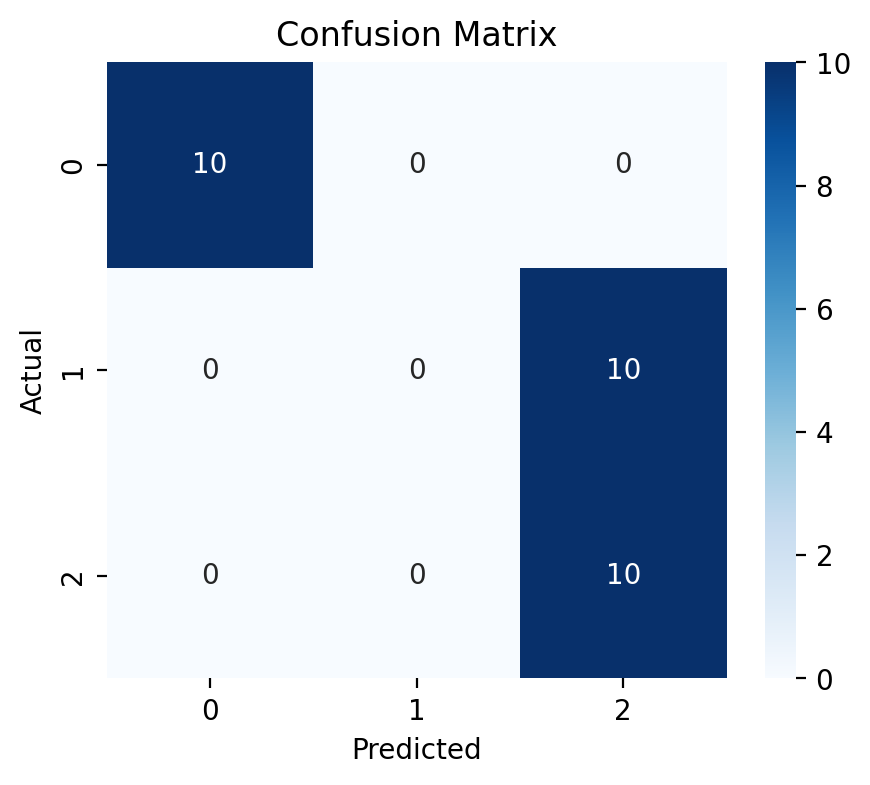

Sample 1: Truth: 2, Predicted: 2
Sample 5: Truth: 1, Predicted: 2
Sample 10: Truth: 2, Predicted: 2
Sample 15: Truth: 0, Predicted: 0
Sample 20: Truth: 0, Predicted: 0
--------------------------------------------------
Batch size: 2, Learning rate: 0.001, Number of epochs: 3
Test Accuracy: 0.6667, F1 Score: 0.5411


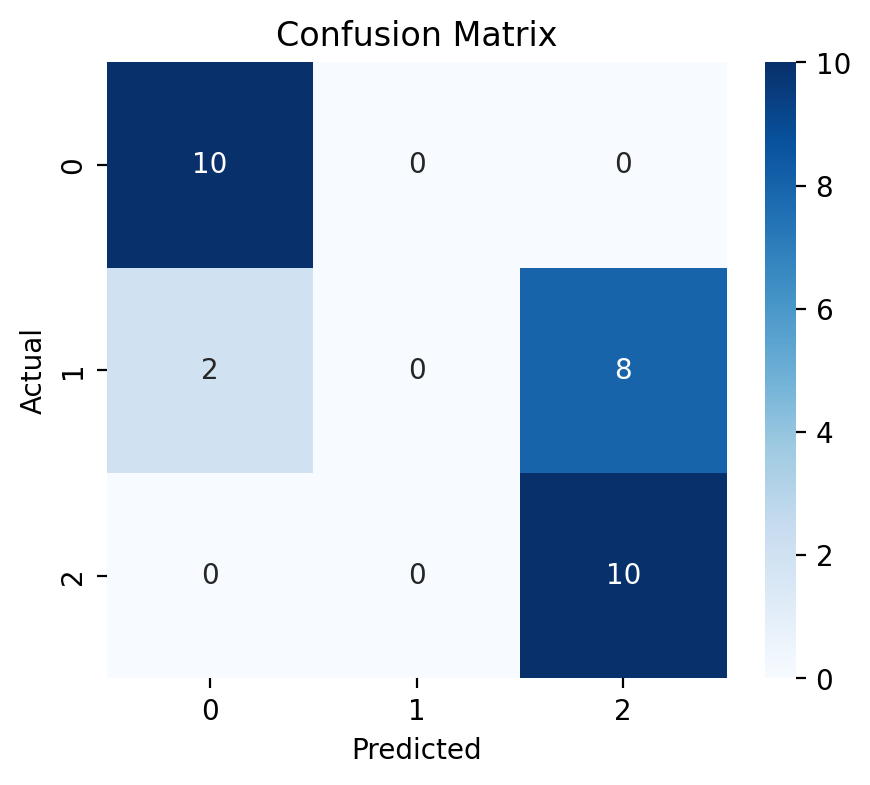

Sample 1: Truth: 2, Predicted: 2
Sample 5: Truth: 1, Predicted: 2
Sample 10: Truth: 2, Predicted: 2
Sample 15: Truth: 0, Predicted: 0
Sample 20: Truth: 0, Predicted: 0
--------------------------------------------------
Batch size: 2, Learning rate: 0.001, Number of epochs: 5
Test Accuracy: 0.8667, F1 Score: 0.8653


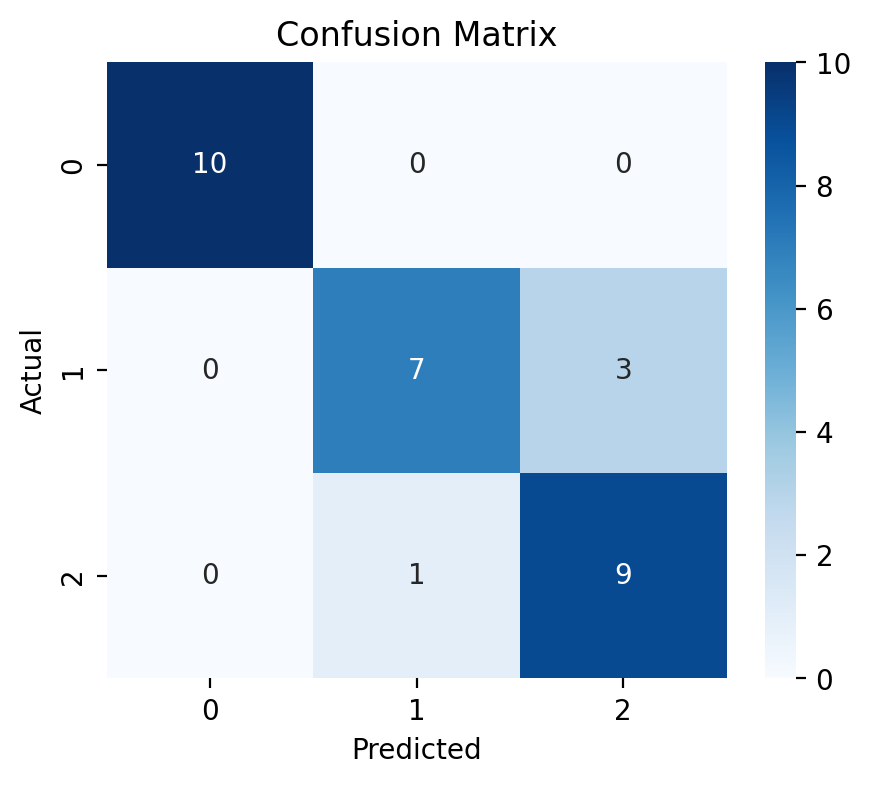

Sample 1: Truth: 2, Predicted: 2
Sample 5: Truth: 1, Predicted: 2
Sample 10: Truth: 2, Predicted: 2
Sample 15: Truth: 0, Predicted: 0
Sample 20: Truth: 0, Predicted: 0
--------------------------------------------------
Batch size: 2, Learning rate: 1e-05, Number of epochs: 1
Test Accuracy: 0.2667, F1 Score: 0.1404


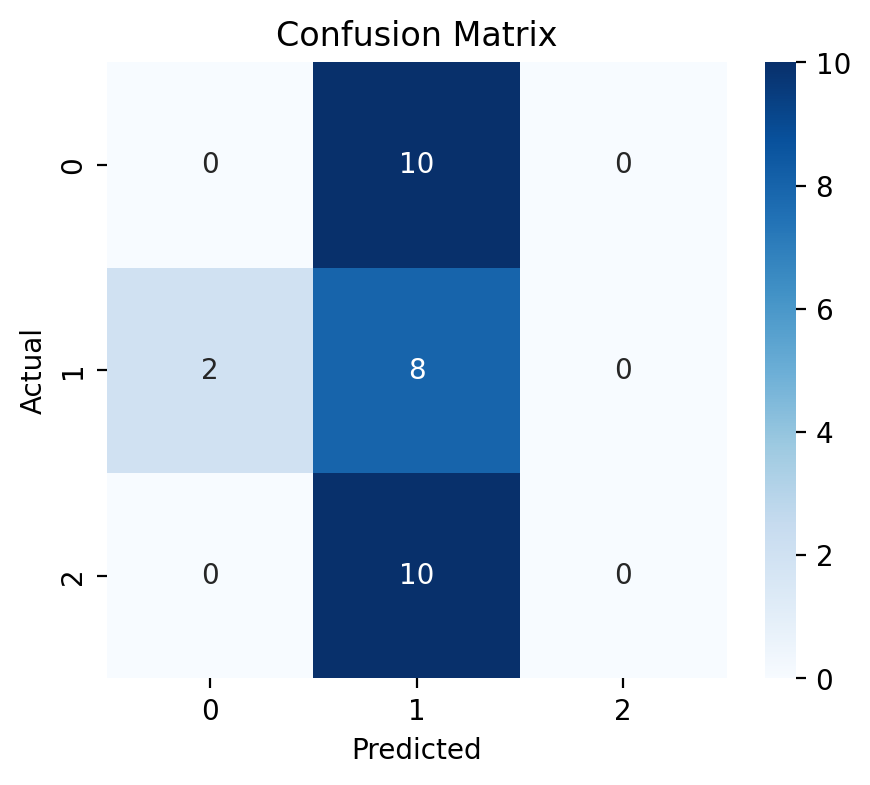

Sample 1: Truth: 2, Predicted: 1
Sample 5: Truth: 1, Predicted: 0
Sample 10: Truth: 2, Predicted: 1
Sample 15: Truth: 0, Predicted: 1
Sample 20: Truth: 0, Predicted: 1
--------------------------------------------------
Batch size: 2, Learning rate: 1e-05, Number of epochs: 3
Test Accuracy: 0.0000, F1 Score: 0.0000


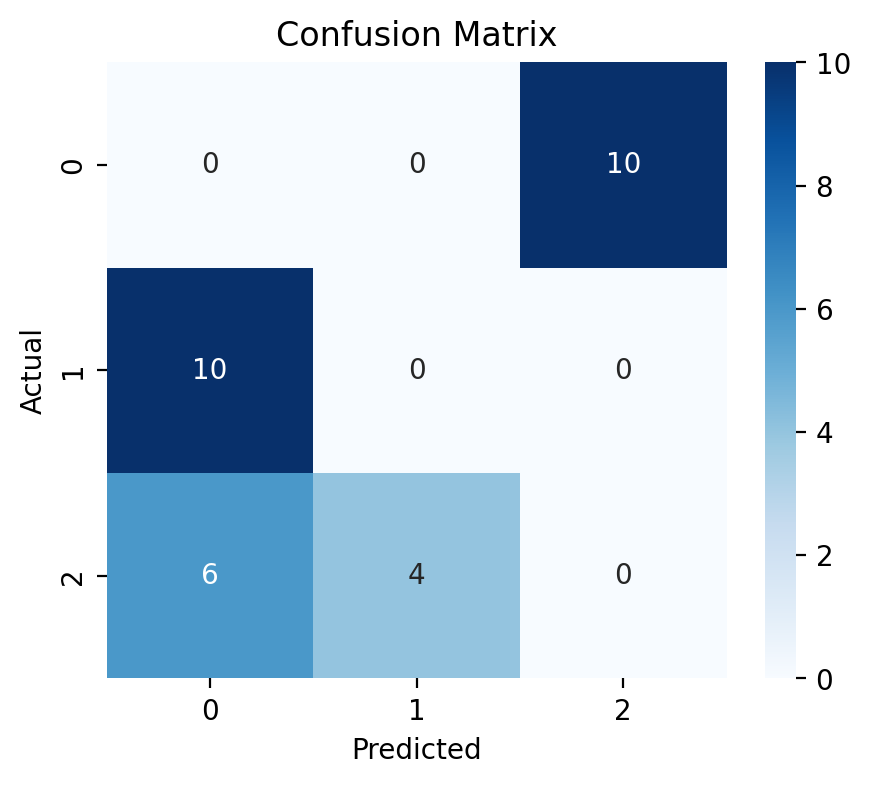

Sample 1: Truth: 2, Predicted: 0
Sample 5: Truth: 1, Predicted: 0
Sample 10: Truth: 2, Predicted: 1
Sample 15: Truth: 0, Predicted: 2
Sample 20: Truth: 0, Predicted: 2
--------------------------------------------------
Batch size: 2, Learning rate: 1e-05, Number of epochs: 5
Test Accuracy: 0.3000, F1 Score: 0.2470


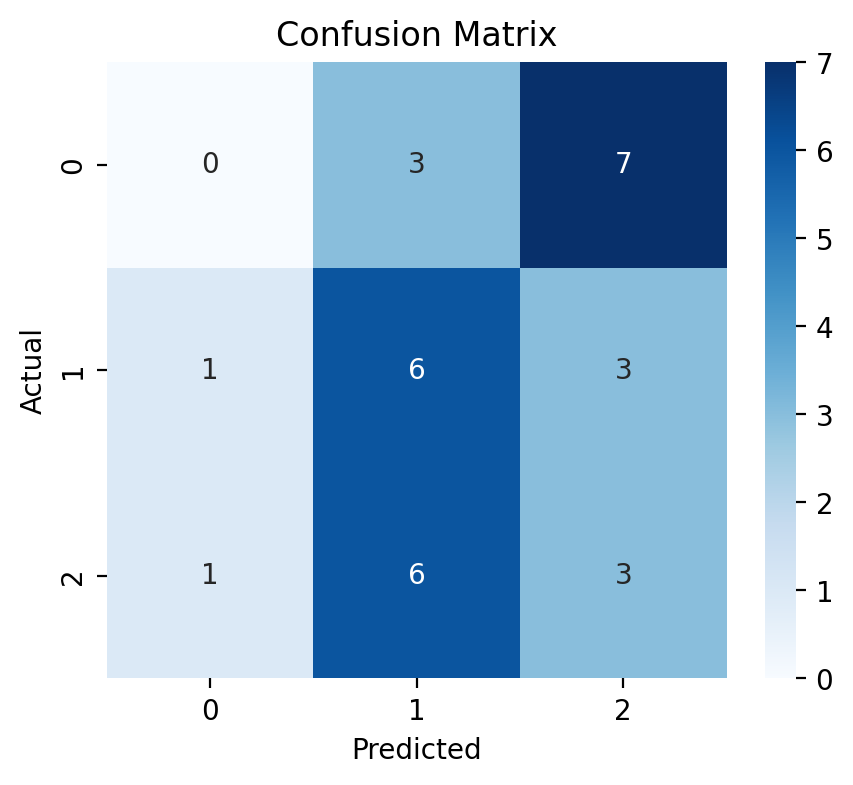

Sample 1: Truth: 2, Predicted: 1
Sample 5: Truth: 1, Predicted: 1
Sample 10: Truth: 2, Predicted: 2
Sample 15: Truth: 0, Predicted: 2
Sample 20: Truth: 0, Predicted: 1
--------------------------------------------------
Batch size: 4, Learning rate: 0.001, Number of epochs: 1
Test Accuracy: 0.3667, F1 Score: 0.3270


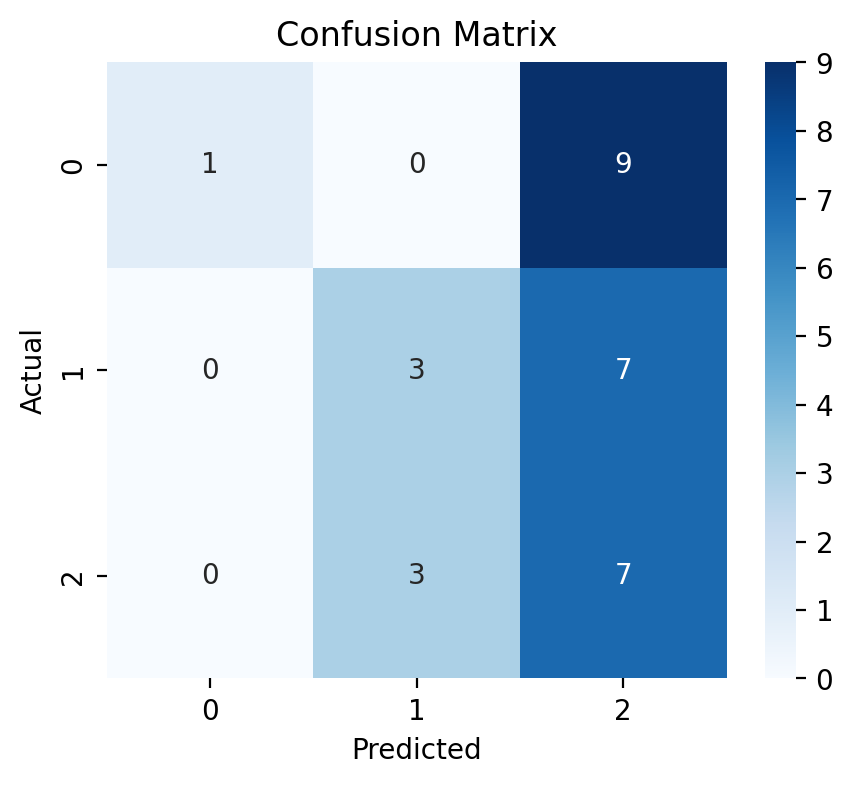

Sample 1: Truth: 2, Predicted: 2
Sample 5: Truth: 1, Predicted: 2
Sample 10: Truth: 2, Predicted: 2
Sample 15: Truth: 0, Predicted: 2
Sample 20: Truth: 0, Predicted: 2
--------------------------------------------------
Batch size: 4, Learning rate: 0.001, Number of epochs: 3
Test Accuracy: 0.3333, F1 Score: 0.1852


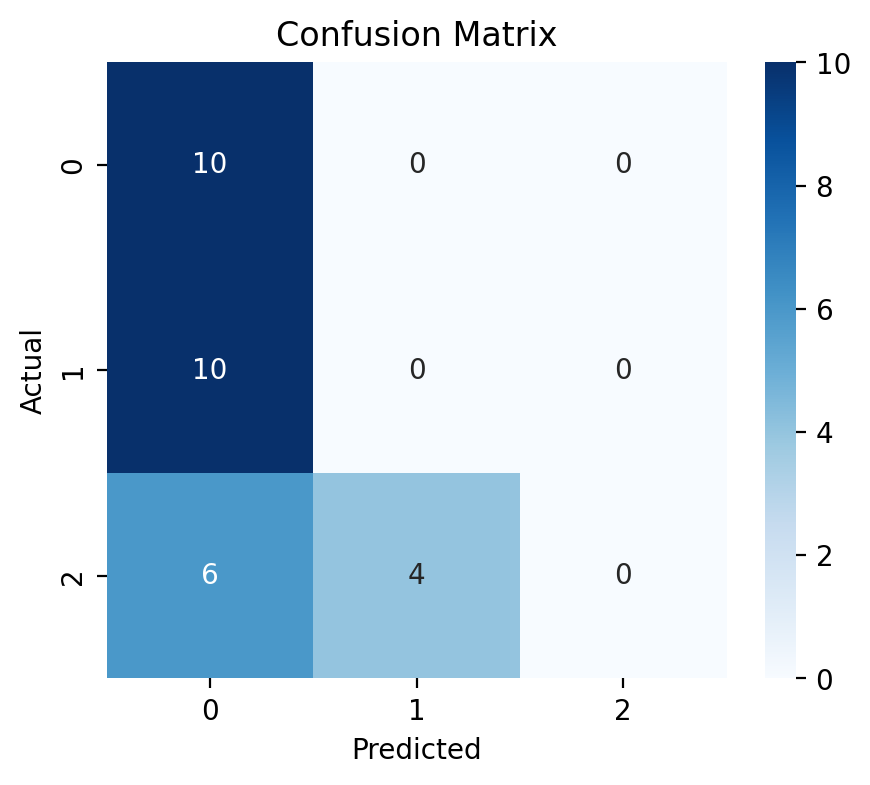

Sample 1: Truth: 2, Predicted: 0
Sample 5: Truth: 1, Predicted: 0
Sample 10: Truth: 2, Predicted: 0
Sample 15: Truth: 0, Predicted: 0
Sample 20: Truth: 0, Predicted: 0
--------------------------------------------------
Batch size: 4, Learning rate: 0.001, Number of epochs: 5
Test Accuracy: 0.7333, F1 Score: 0.6825


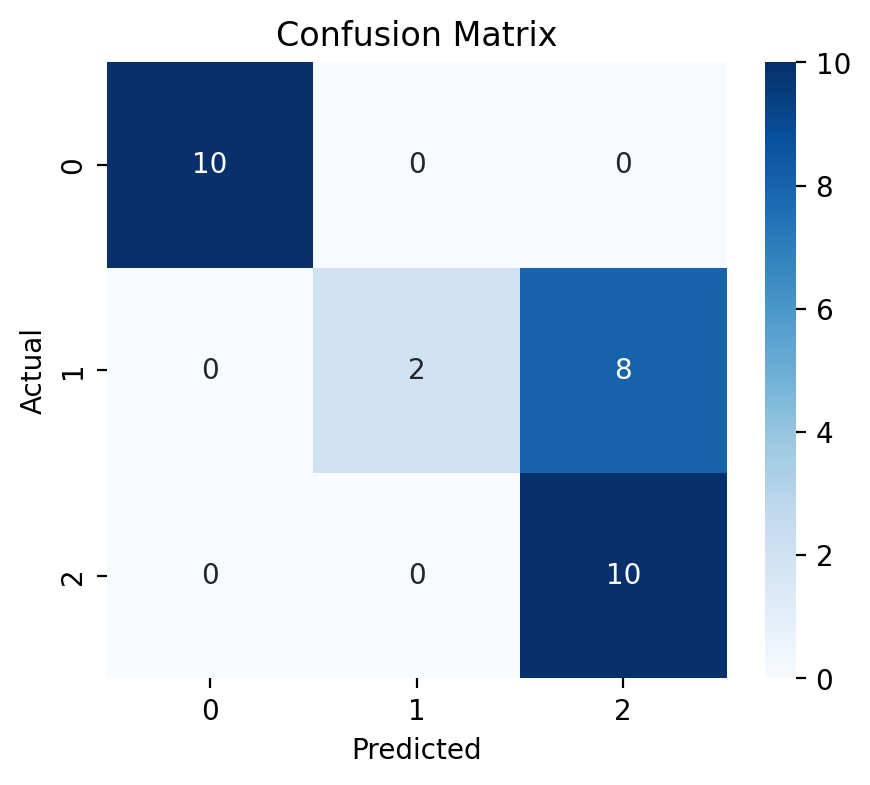

Sample 1: Truth: 2, Predicted: 2
Sample 5: Truth: 1, Predicted: 2
Sample 10: Truth: 2, Predicted: 2
Sample 15: Truth: 0, Predicted: 0
Sample 20: Truth: 0, Predicted: 0
--------------------------------------------------
Batch size: 4, Learning rate: 1e-05, Number of epochs: 1
Test Accuracy: 0.3333, F1 Score: 0.1667


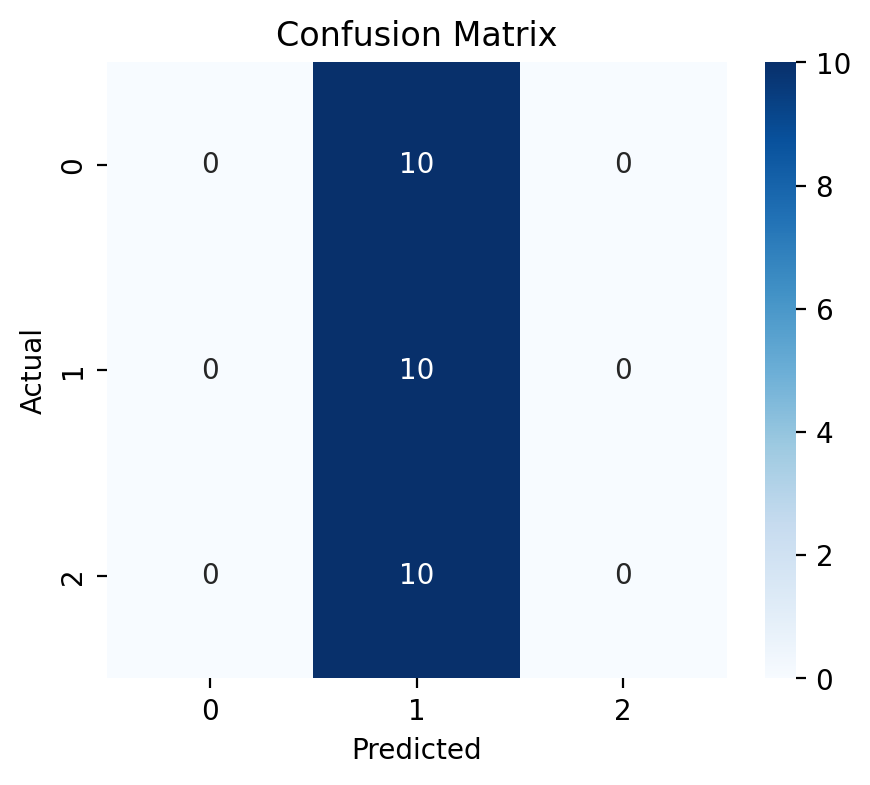

Sample 1: Truth: 2, Predicted: 1
Sample 5: Truth: 1, Predicted: 1
Sample 10: Truth: 2, Predicted: 1
Sample 15: Truth: 0, Predicted: 1
Sample 20: Truth: 0, Predicted: 1
--------------------------------------------------
Batch size: 4, Learning rate: 1e-05, Number of epochs: 3
Test Accuracy: 0.3333, F1 Score: 0.1667


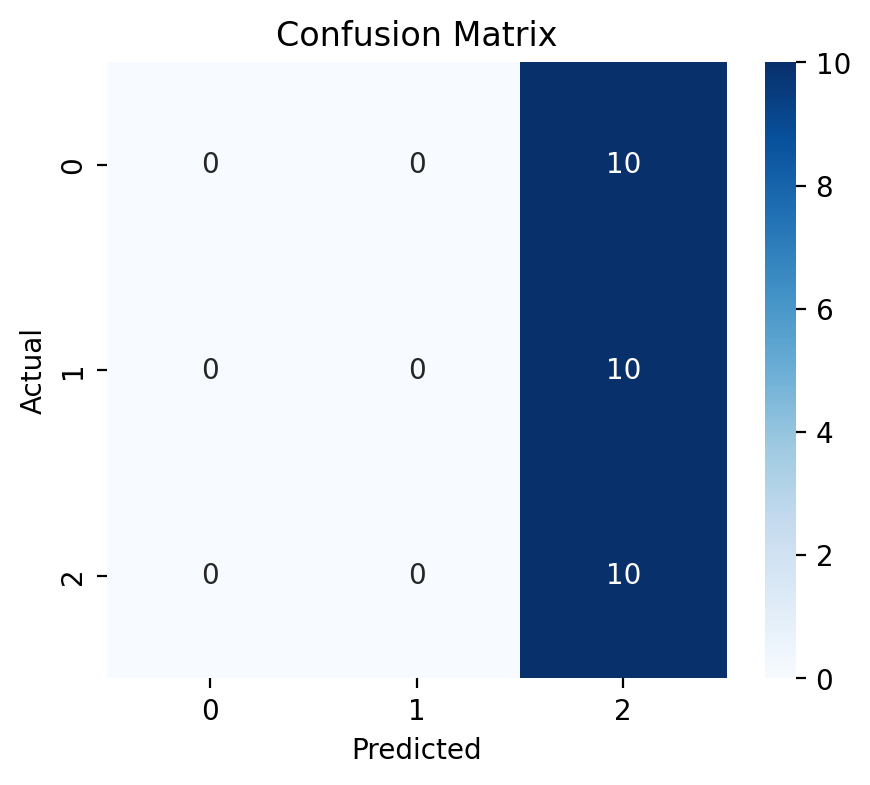

Sample 1: Truth: 2, Predicted: 2
Sample 5: Truth: 1, Predicted: 2
Sample 10: Truth: 2, Predicted: 2
Sample 15: Truth: 0, Predicted: 2
Sample 20: Truth: 0, Predicted: 2
--------------------------------------------------
Batch size: 4, Learning rate: 1e-05, Number of epochs: 5
Test Accuracy: 0.4000, F1 Score: 0.2986


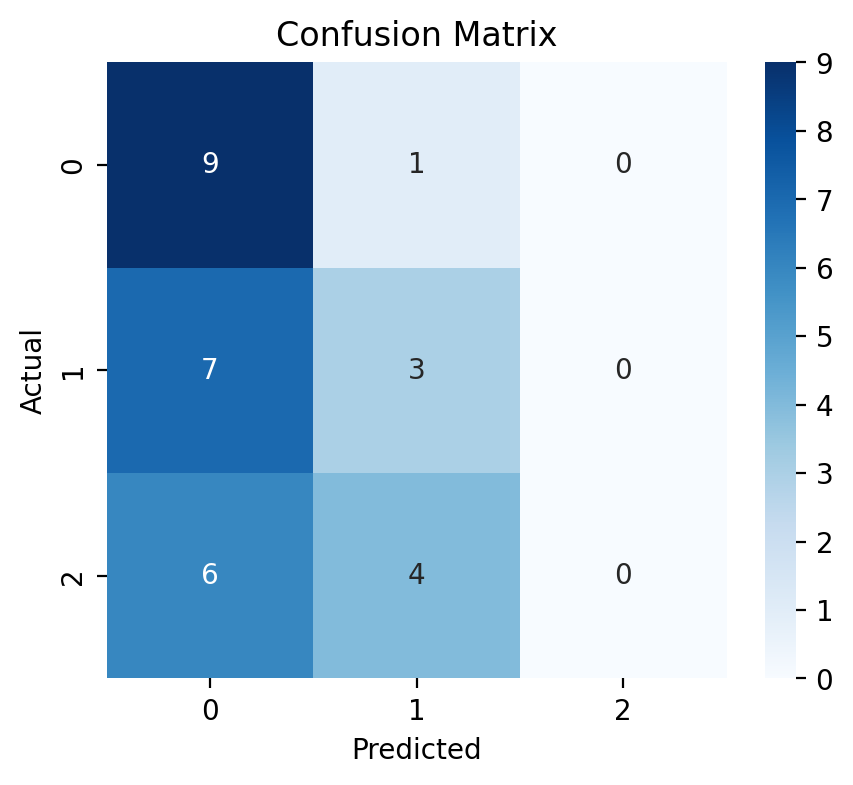

Sample 1: Truth: 2, Predicted: 0
Sample 5: Truth: 1, Predicted: 0
Sample 10: Truth: 2, Predicted: 1
Sample 15: Truth: 0, Predicted: 0
Sample 20: Truth: 0, Predicted: 0

Final Results:
{'batch_size': 2, 'learning_rate': 0.001, 'epochs': 1, 'accuracy': 0.6666666666666666, 'f1_score': 0.5555555555555555}
{'batch_size': 2, 'learning_rate': 0.001, 'epochs': 3, 'accuracy': 0.6666666666666666, 'f1_score': 0.5411255411255411}
{'batch_size': 2, 'learning_rate': 0.001, 'epochs': 5, 'accuracy': 0.8666666666666667, 'f1_score': 0.8653198653198653}
{'batch_size': 2, 'learning_rate': 1e-05, 'epochs': 1, 'accuracy': 0.26666666666666666, 'f1_score': 0.14035087719298245}
{'batch_size': 2, 'learning_rate': 1e-05, 'epochs': 3, 'accuracy': 0.0, 'f1_score': 0.0}
{'batch_size': 2, 'learning_rate': 1e-05, 'epochs': 5, 'accuracy': 0.3, 'f1_score': 0.24695652173913044}
{'batch_size': 4, 'learning_rate': 0.001, 'epochs': 1, 'accuracy': 0.36666666666666664, 'f1_score': 0.32702020202020204}
{'batch_size': 4, 'lear

In [ ]:
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]
model_class = MLP

results = []

for batch_size, lr, epochs in product(batch_sizes, learning_rates, epochs_list):
    
    model, train_losses, val_losses, test_loader = train_model(
        train_dataset, val_dataset, test_dataset, model_class,
        batch_size=batch_size, learning_rate=lr, num_epochs=epochs
    )
    
    acc, f1, y_true, y_pred = evaluate_model(model, test_loader)
    
    results.append({"batch_size": batch_size, "learning_rate": lr, "epochs": epochs, "accuracy": acc, "f1_score": f1})

    # Plot 5 samples from the test set
    sample_indices = [1,5,10,15,20]
    for i in sample_indices:
        print(f"Sample {i}: Truth: {y_true[i]}, Predicted: {y_pred[i]}")

print("\nFinal Results:")
for res in results:
    print(res)

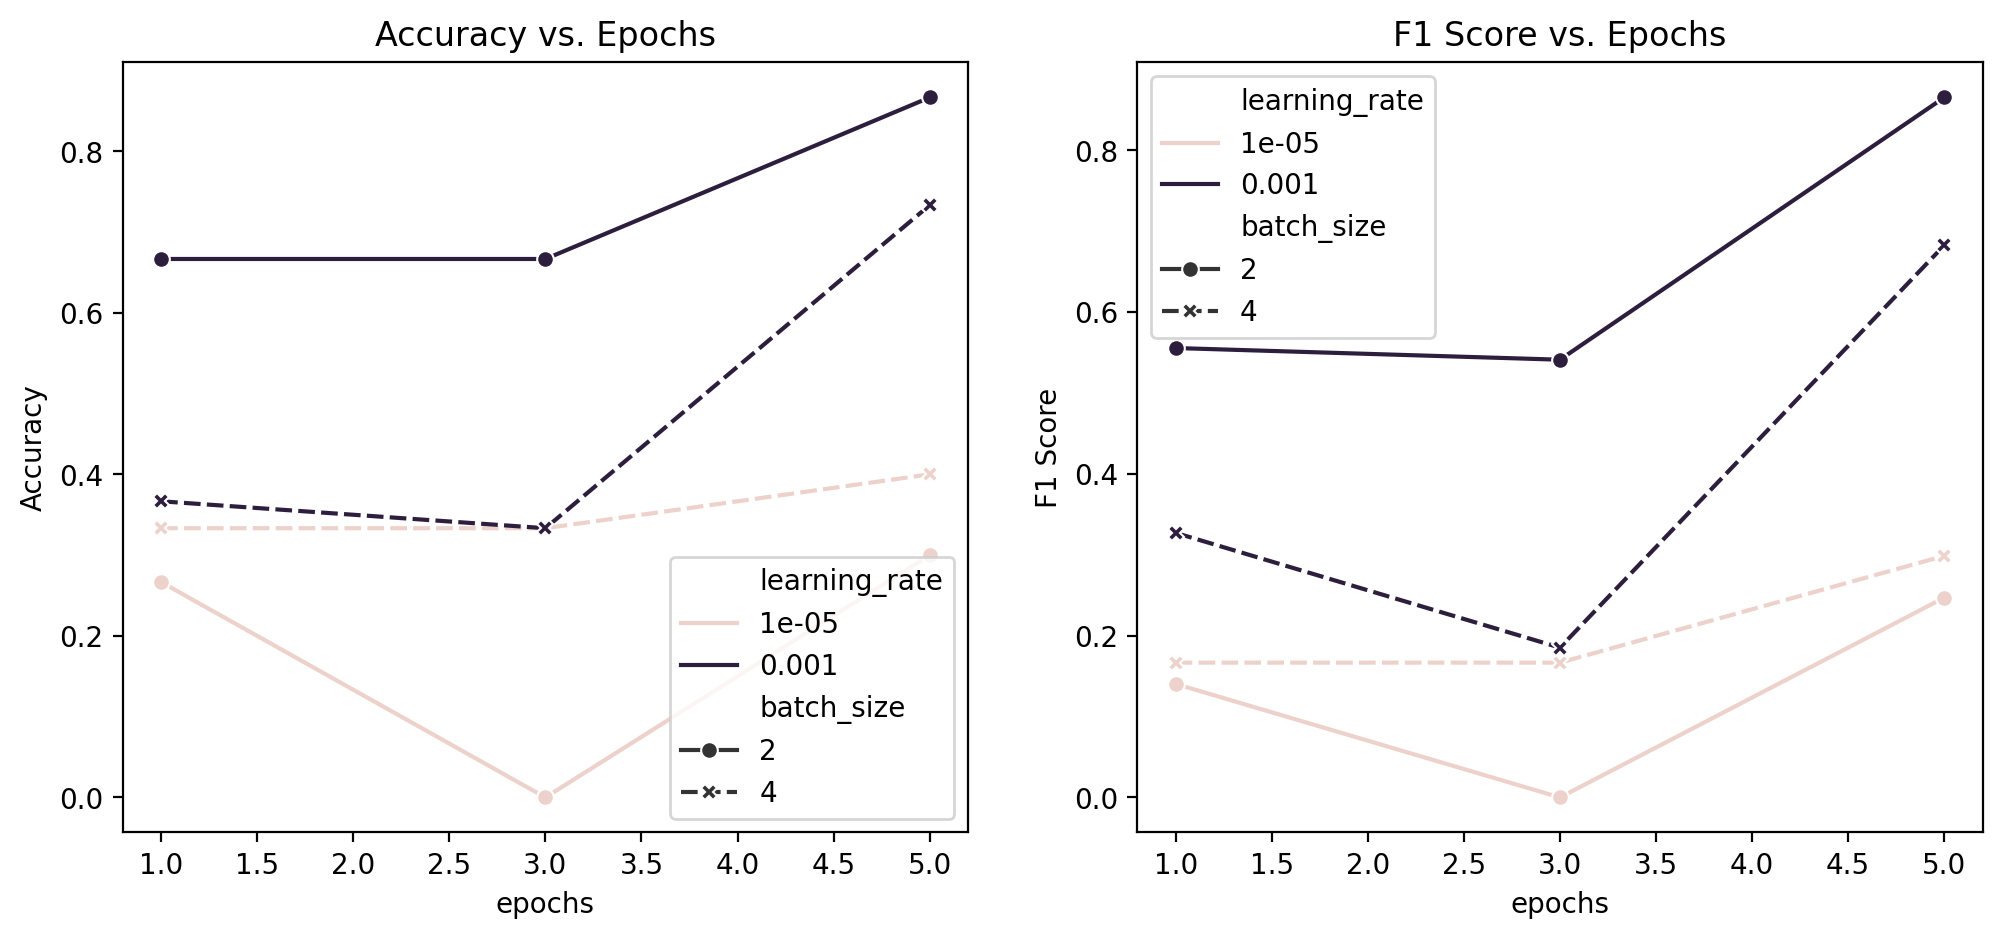

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Plot Accuracy and F1 Score trends
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy Plot
sns.lineplot(data=df_results, x="epochs", y="accuracy", hue="learning_rate", style="batch_size", markers=True, ax=axes[0])
axes[0].set_title("Accuracy vs. Epochs")
axes[0].set_ylabel("Accuracy")

# F1 Score Plot
sns.lineplot(data=df_results, x="epochs", y="f1_score", hue="learning_rate", style="batch_size", markers=True, ax=axes[1])
axes[1].set_title("F1 Score vs. Epochs")
axes[1].set_ylabel("F1 Score")

plt.show()

In [2]:
%pip install autogluon

  Using cached seqeval-1.2.2.tar.gz (43 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sentencepiece-0.2.0-cp312-cp312-win_amd64.whl.metadata (8.3 kB)
  Using cached blis-0.7.11-cp312-cp312-win_amd64.whl.metadata (7.6 kB)
  Using cached distlib-0.3.9-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached appdirs-1.4.4-py2.py3-none-an